In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

def load_data(file_path):
    brent_data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
    brent_data.set_index('Date', inplace=True)
    return brent_data

brent_data = load_data('C:/Users/nejat/AIM Projects/week10 data/BrentOilPrices.csv')
print(brent_data.head())


C:\Users\nejat\AppData\Local\Temp\ipykernel_2892\1480258326.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


In [4]:
missing_values = brent_data.isnull().sum()
print("Missing values in Brent data:\n", missing_values)

brent_data.fillna(method='ffill', inplace=True)

print("Missing values after filling:\n", brent_data.isnull().sum())

Missing values in Brent data:
 Price    0
dtype: int64
Missing values after filling:
 Price    0
dtype: int64


C:\Users\nejat\AppData\Local\Temp\ipykernel_2892\2001004146.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  brent_data.fillna(method='ffill', inplace=True)


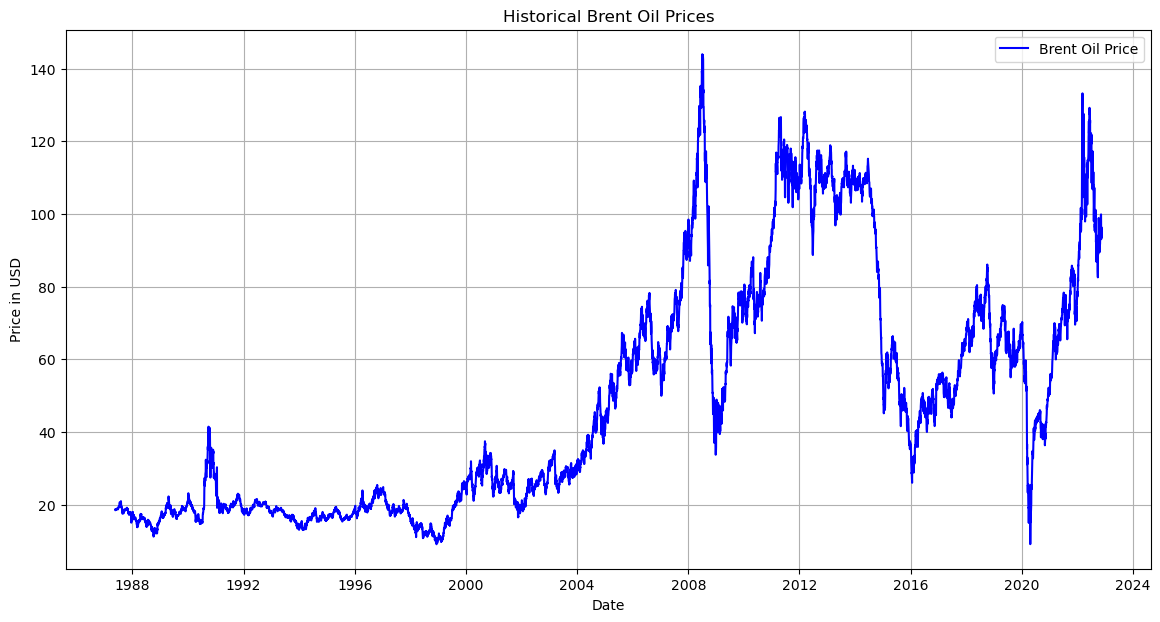

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


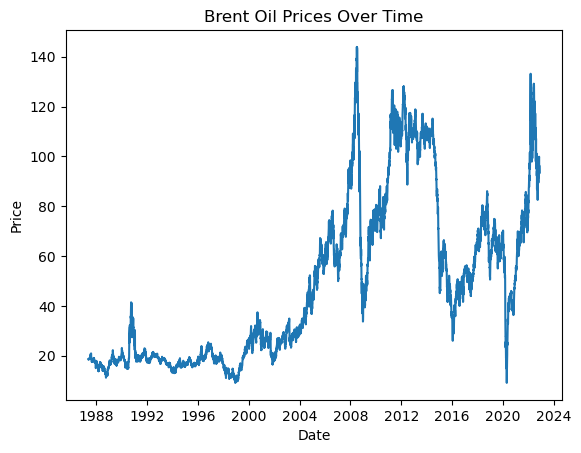

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(brent_data.index, brent_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid()
plt.show()

sns.lineplot(data=brent_data, x=brent_data.index, y='Price')
plt.title('Brent Oil Prices Over Time')
plt.show()


In [8]:
model_arima = ARIMA(brent_data['Price'], order=(5, 1, 0))  # Example order
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())


C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Sun, 03 Nov 2024   AIC                          29093.226
Time:                        17:41:10   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

In [10]:
predictions = model_arima_fit.forecast(steps=30)  
print("Predictions for the next 30 days:\n", predictions)

rmse = np.sqrt(mean_squared_error(brent_data['Price'][-30:], predictions))
print(f'RMSE: {rmse}')


Predictions for the next 30 days:
 9011    93.392185
9012    93.470938
9013    93.536262
9014    93.477045
9015    93.476757
9016    93.479749
9017    93.481342
9018    93.479974
9019    93.480029
9020    93.480111
9021    93.480145
9022    93.480113
9023    93.480115
9024    93.480117
9025    93.480118
9026    93.480117
9027    93.480117
9028    93.480117
9029    93.480117
9030    93.480117
9031    93.480117
9032    93.480117
9033    93.480117
9034    93.480117
9035    93.480117
9036    93.480117
9037    93.480117
9038    93.480117
9039    93.480117
9040    93.480117
Name: predicted_mean, dtype: float64
RMSE: 2.632030002928291


C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


^C
